In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

Intercalibrazione

In [139]:
import pandas as pd
data=pd.read_excel("../Dati/InterCalibrazione.xlsx", sheet_name='batch' )
display(data)

channels = [0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14, 15]
channel_idx = [0, -1, 1, 2, 3, 4, 5, 6, 7, -1, 8, 9, -1, -1, 10, 11]

ch=np.zeros((12,5))
ch_err=np.zeros((12,5))

for j in channels:
    for i in range(0,5):
        
        ch[channel_idx[j]][i] = data["val_"+str(i+1)][j]
        ch_err[channel_idx[j]][i] = np.sqrt(data["err_stat_"+str(i+1)][j]**2 + data["err_sist_"+str(i+1)][j]**2)


,ch,val_1,err_stat_1,err_sist_1,val_2,err_stat_2,err_sist_2,val_3,err_stat_3,err_sist_3,...,err_stat_4,err_sist_4,media,std,drift relativo,Drift relativo [%],Range,val_5,err_stat_5,err_sist_5
0,0,-312.74,0.22,2.3,-312.4,0.3,3.5,-312.90,0.30,2.0,...,0.22,1.10,-311.7725,1.826935,0.005860,0.585983,L,-310.17,0.22,1.64
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,-335.93,0.25,1.5,-336.6,2.0,1.4,-336.60,0.60,1.4,...,0.53,2.60,-337.2250,1.725814,0.005118,0.511769,L,-339.30,0.31,1.70
3,3,-957.88,0.94,6.2,-955.0,1.0,2.9,-958.27,0.86,8.0,...,1.10,1.20,-957.3625,1.586577,0.001657,0.165724,H,-959.35,0.96,5.20
4,4,-1444.99,0.95,2.2,-1467.5,0.8,3.1,-1474.96,0.73,4.0,...,1.20,4.80,-1467.7125,16.482122,0.011230,1.122980,H,-1487.60,0.96,2.50
5,5,-1529.10,1.30,5.3,-1530.0,1.0,8.0,-1536.94,0.92,7.0,...,1.10,6.90,-1533.2850,4.328922,0.002823,0.282330,H,-1541.58,1.28,5.08
6,6,-272.68,0.63,4.2,-281.8,0.7,3.6,-280.22,0.54,6.0,...,1.50,4.50,-279.7500,5.003692,0.017886,1.788630,L,-280.96,0.67,2.93
7,7,-1671.30,1.20,1.0,-1695.0,1.0,0.5,-1697.00,1.00,2.0,...,1.20,5.30,-1695.8750,19.980553,0.011782,1.178185,H,-1730.30,1.60,3.30
8,8,-1119.82,0.71,1.5,-1140.9,0.7,3.5,-1155.02,0.66,2.0,...,0.73,2.40,-1143.8150,17.855497,0.015610,1.561048,H,-1161.20,0.75,0.81
9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
peak_centers=np.array(data["media"])     #posizioni dei picchi
print(peak_centers)

[ -311.7725        nan  -337.225   -957.3625 -1467.7125 -1533.285
  -279.75   -1695.875  -1143.815         nan  -386.05    -551.26
        nan        nan  -530.0575  -801.41  ]


In [141]:
channel_ref=3
ref=peak_centers[channel_ref]

In [142]:
coeff_cal=peak_centers/peak_centers[channel_ref]
print("coefficienti di intercalibrazione\n", coeff_cal)
list=[0,2,3,4,5,6,7,8,10,11,14,15]

coefficienti di intercalibrazione
 [0.32565773        nan 0.35224379 1.         1.53307916 1.60157203
 0.29220906 1.7714032  1.19475643        nan 0.40324329 0.57581115
        nan        nan 0.55366436 0.83710193]


##  Test

16 16


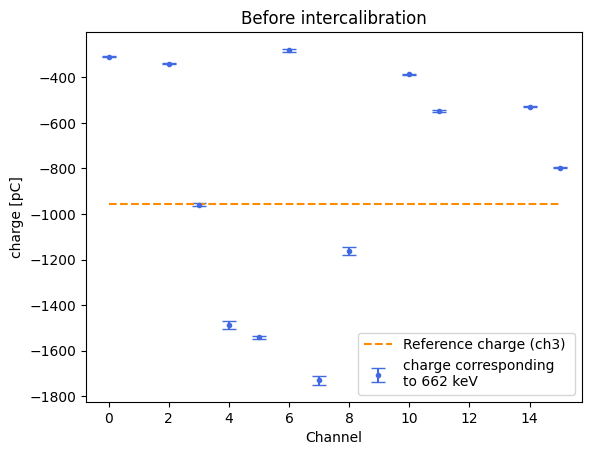

In [143]:
peak_centers=np.array(data["val_5"])     #posizioni dei picchi dei dati di test

peak_err_stat=np.array(data["err_stat_5"])      #errori stocastici sulla posizione dei picchi

peak_err_sist=np.array(data["err_sist_5"])  #errori sistematici

peak_err_drift=np.array(data["std"])  #errori di drift

peak_err=np.sqrt(peak_err_stat**2 + (peak_err_sist)**2 + (peak_err_drift)**2)

print(len(peak_centers), len(peak_err) )

plt.errorbar(list, peak_centers[list], yerr=peak_err[list], ls='', capsize=5, marker='.', color='royalblue', label='charge corresponding\nto 662 keV')
plt.title("Before intercalibration")
plt.plot(list, 0*np.array(list) + ref, color='darkorange', ls='--', label='Reference charge (ch3) '.format(channel_ref))
plt.xlabel('Channel')
plt.ylabel("charge [pC]")
plt.legend(loc='lower right')

[-952.44168945 -963.2533064  -959.35       -970.33475902 -962.54178626
 -961.50337087 -976.79624604 -971.91358305 -959.96638713 -947.72392315
 -954.92871505 -951.25810603]
[ 7.56896452  6.93337809  5.52076308 10.89197645  4.24327346 19.97547235
 11.46793806 14.97341869  5.41900489  7.88074797  6.56998528  4.53465343]
[ 0.65012995 -0.84963005 -0.36000458 -1.1909922  -1.22058743 -0.20729777
 -1.69461554 -0.97179431 -0.4805102   1.22305356  0.37043994  1.34616549]
[-0.00794691 -0.00719788 -0.00575469 -0.01122497 -0.0044084  -0.02077525
 -0.01174036 -0.01540612 -0.00564499 -0.00831545 -0.00688008 -0.00476701]


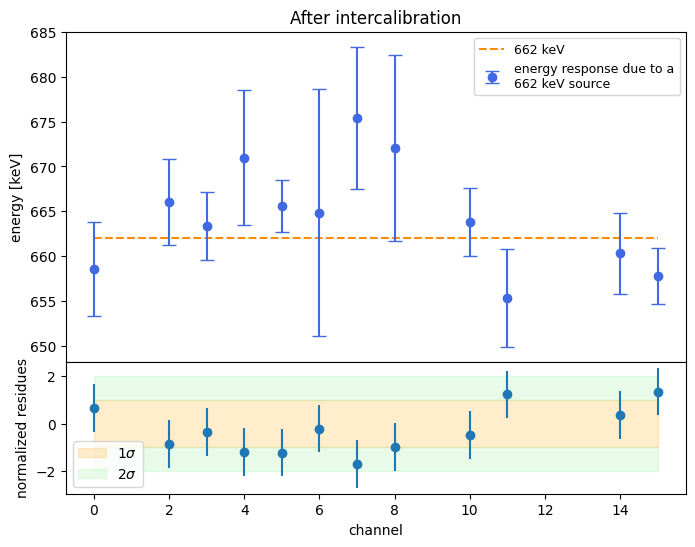

In [144]:


###########################################################################
test_peak_centers=np.array([peak_centers[i]/coeff_cal[i] for i in list])
print(test_peak_centers)
test_peak_errors=np.array([peak_err[i]/coeff_cal[i] for i in list])

print(test_peak_errors)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [5, 2]})

print( (test_peak_centers-ref)/test_peak_errors  )
ax1.plot(list, 0*np.array(list) + 662, color='darkorange', ls='--', label='662 keV '.format(channel_ref))
ax1.errorbar(list, test_peak_centers*662/ref, yerr=test_peak_errors*662/np.abs(ref), ls='', capsize=5, marker='o', color='royalblue', label='energy response due to a\n662 keV source')
ax1.legend(fontsize=9)
ax1.set_title("After intercalibration")
ax1.set_ylabel("energy [keV]")

xlim = ax1.get_xlim()
ax2.errorbar(list,(np.array(test_peak_centers)-ref)/np.array(test_peak_errors), yerr=1, ls=' ', marker='o')
ax2.fill_between([0,15], [-1, -1], [1, 1], color = "orange", alpha = 0.2, label = r'$1\sigma$')
ax2.fill_between([0,15], [-2, -2], [-1, -1], color = "lightgreen", alpha = 0.2, label = r'$2\sigma$')
ax2.fill_between([0,15], [2, 2], [1, 1], color = "lightgreen", alpha = 0.2)
ax2.set_xlabel("channel")
ax2.set_ylabel("normalized residues")
ax2.legend()
plt.subplots_adjust(hspace=0)

print(test_peak_errors/test_peak_centers)

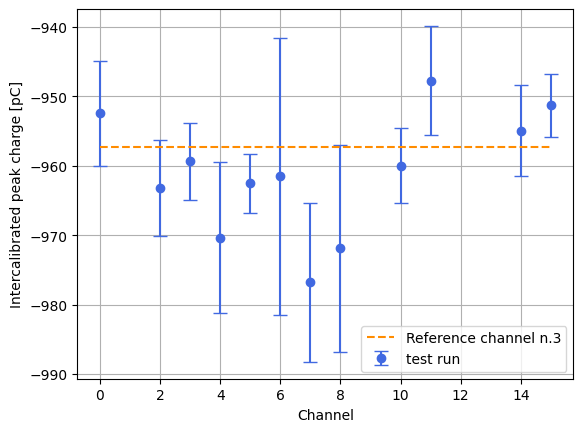

In [145]:
#plot
#plt.errorbar(list, train_peak_centers, yerr=train_peak_errors, ls='', capsize=5,  marker='o', color='darkorange', label= 'calibration run')
plt.errorbar(list, test_peak_centers, yerr=test_peak_errors, ls='', capsize=5, marker='o', color='royalblue', label='test run')
plt.plot(list, 0*np.array(list) + ref, color='darkorange', ls='--', label='Reference channel n.{}'.format(channel_ref))
#plt.plot(list, (test_peak_centers-ref)/test_peak_errors, ls='', marker='o', color='red')
#plt.ylim(peak_centers[channel_ref]-50, peak_centers[channel_ref]+50)
#plt.ylim(-990, -930)
plt.grid()
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge [pC]')
plt.legend(loc= 'lower right')


#plot in kev
    

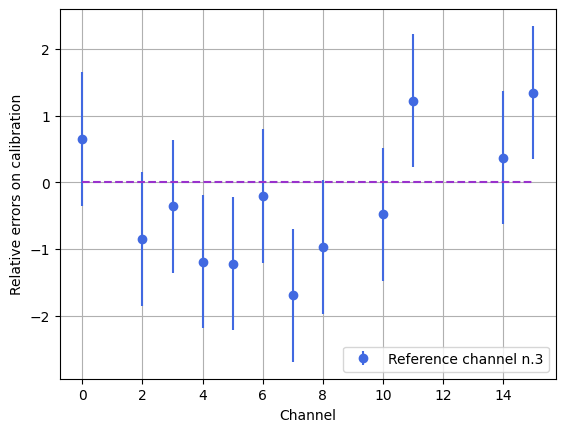

In [146]:
plt.errorbar(list, (test_peak_centers-ref)/test_peak_errors, yerr=1, ls='', marker='o', color='royalblue', label='Reference channel n.{}'.format(channel_ref))
plt.plot(list, 0*np.array(list), color='darkorchid', ls='--')
plt.grid()
plt.xlabel('Channel')
plt.ylabel('Relative errors on calibration')
plt.legend(loc= 'lower right')



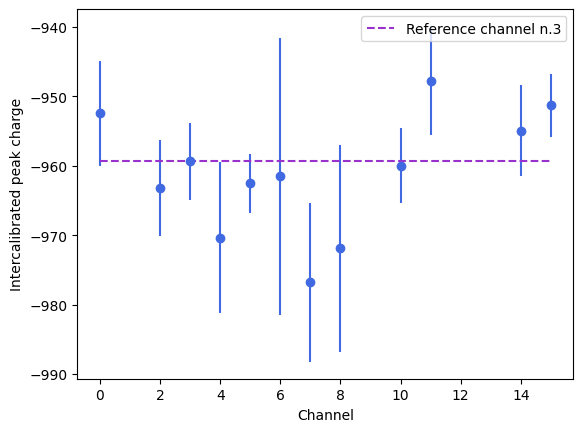

In [147]:
#plot con train e test insieme
#plot
plt.errorbar(list, test_peak_centers, yerr=test_peak_errors, ls='', marker='o', color='royalblue')
plt.plot(list, 0*np.array(list) + peak_centers[channel_ref], color='darkorchid', ls='--', label='Reference channel n.{}'.format(channel_ref))
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge')
plt.legend()
    

In [148]:
#0, 3, 5, 7, 10, 15
nice_channels=[0, 2,3,4, 5,6, 7, 8,10, 11,14,15]

# Picchi all together train

In [149]:
def load_histo(dat_PATH):
    data = np.loadtxt(dat_PATH, skiprows=0, comments='==')
    noises_edges = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))
    noises_values = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))

    for i in range(int(data.shape[0]/2)):
        noises_edges[i] = (data[2 * i])
        noises_values[i] = (data[2 * i + 1])

    return noises_edges, noises_values


def rebin(data, factor):
    if len(data) % factor != 0:
        raise ValueError("Length of data must be divisible by factor.")
    rebinned_data = np.sum(data.reshape(-1, factor), axis=1)
    return rebinned_data

In [150]:
PATH_MARTI="../Dati/Run_chall_ChargeHistos_4_12_2024_10M.dat"
#PATH_SAM="../Dati/12_APR/Run_chall_ChargeHistos_4_12_2024_10M.dat"
edge_N_all, bin_N_all = load_histo(PATH_MARTI)

channel = 0

if(channel == 12 or channel == 13 or channel == 1):
    exit()

channel_idx = [0, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, -1, 11, 12]

    
edge_N = edge_N_all[channel_idx[channel]]
bin_N = bin_N_all[channel_idx[channel]]

rebin_fact = 1
bin_N = rebin(bin_N, rebin_fact)
tmp = []
for i in range(len(edge_N)):
    if(i % rebin_fact == 0):
        tmp.append(edge_N[i])

tmp.append(edge_N[-1])
edge_N = np.array(tmp)

centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")
err_N = np.sqrt(bin_N)


Text(0, 0.5, 'counts')

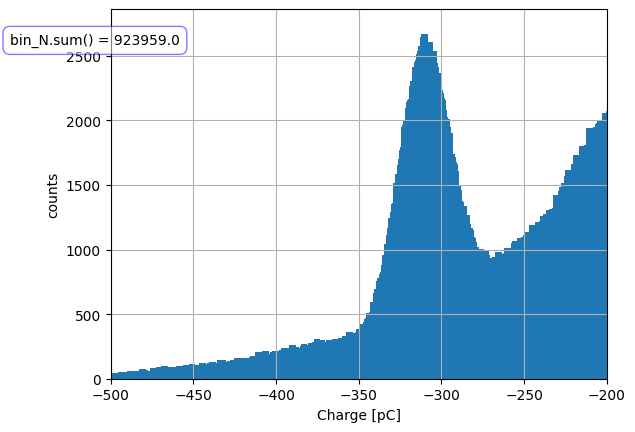

In [151]:
lim_list = [[-500, -200],  #ch0
                [-1, -1],  #ch1
                [-360, -300],  #ch2
                [-350, -280],  #ch3
                [-320, -263],  #ch4
                [-320, -270],  #ch5
                [-310, -250],  #ch6
                [-365, -310],  #ch7
                [-335, -280],  #ch8
                [340, 470],  #ch9
                [-409, -340],  #ch10
                [-318, -255],  #ch11
                [-1, -1],  #ch12
                [-1, -1],  #ch13
                [-350, -280],  #ch14
                [-340, -290]   #ch15
                ]

lim_N = lim_list[channel]
plt.text(centers_N.min() * 0.85, bin_N.max() * 95 / 100, f'{bin_N.sum() = }', fontsize=10, color='black', ha='center',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='blue', boxstyle='round,pad=0.5'))
plt.bar(centers_N, bin_N, width = 4)
plt.xlim(lim_N)
plt.grid()
plt.xlabel("Charge [pC]")
plt.ylabel("counts")

2289.0


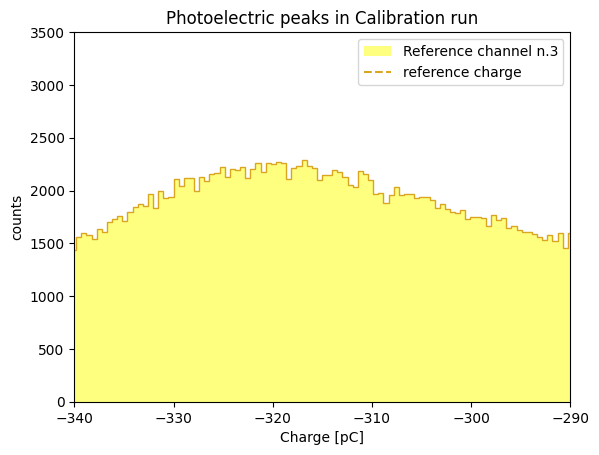

In [152]:
for ch in nice_channels:

    lim_N=lim_list[ch]
    edge_N = edge_N_all[channel_idx[ch]]
    bin_N = bin_N_all[channel_idx[ch]]
    centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")
    edge_N=edge_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
    bin_N = bin_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
    centers_N = centers_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]

    #sfrutto la ricalibrazione per spostare i picchi

    if(ch!=channel_ref):
        #plt.bar(centers_N/coeff_c
        plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, histtype='step',fill=False)
    else:
        plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, color='yellow', alpha=0.5, label ='Reference channel n.{}'.format(channel_ref))
        counts,b,p=plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, histtype='step',fill=False, edgecolor='goldenrod')
        plt.vlines(x=peak_centers[channel_ref], ymin=0, ymax=np.max(counts), linestyle='--', linewidth=1.5, color='goldenrod', label='reference charge')
        print(np.max(counts))

plt.xlim(-340, -290)
plt.ylim(0, 3500)
plt.xlabel("Charge [pC]")
plt.ylabel("counts")
plt.title('Photoelectric peaks in Calibration run')
plt.legend()





   

# Picchi all together test

In [153]:
PATH_HR = "../Dati/5_batch/Run_chall_2000_ChargeHistos_4_19_2024.dat"
#PATH_LR = "../Dati/5_batch/Run_chall_1000pc_ChargeHistos_4_19_2024.dat"
channel = 15

if(channel == 12 or channel == 13 or channel == 1 or channel == 9):
    raise Exception("Cambia canale")

channel_idx = [0, -1, 1, 2, 3, 4, 5, 6, 7, -1, 8, 9, -1, -1, 10, 11]


edge_N_all, bin_N_all = load_histo(PATH_HR)



edge_N = edge_N_all[channel_idx[channel]]
bin_N = bin_N_all[channel_idx[channel]]

rebin_fact = 1
bin_N = rebin(bin_N, rebin_fact)
tmp = []
for i in range(len(edge_N)):
    if(i % rebin_fact == 0):
        tmp.append(edge_N[i])

tmp.append(edge_N[-1])
edge_N = np.array(tmp)

centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")

Text(0, 0.5, 'counts')

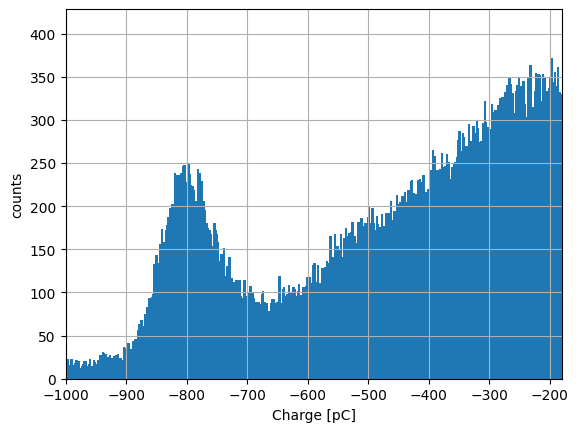

In [154]:
lim_list = [[-1000, -180],  #ch0
                [-1, -1],  #ch1
                [-1000, -180],  #ch2
                [-2000, -180],  #ch3
                [-2000, -180],  #ch4
                [-2000, -180],  #ch5
                [-1000, -180],  #ch6
                [-2000, -180],  #ch7
                [-2000, -180],  #ch8
                [-2000, -180],  #ch9
                [-1000, -180],  #ch10
                [-1000, -180],  #ch11
                [-1, -1],  #ch12
                [-1, -1],  #ch13
                [-1000, -180],  #ch14
                [-1000, -180]   #ch15
                ]

lim_N = lim_list[channel]
#plt.text(centers_N.min() * 0.85, bin_N.max() * 95 / 100, f'{bin_N.sum() = }', fontsize=10, color='black', ha='center',
    #     bbox=dict(facecolor='white', alpha=0.5, edgecolor='blue', boxstyle='round,pad=0.5'))
plt.bar(centers_N, bin_N, width = 4)
plt.xlim(lim_N)
plt.grid()
plt.xlabel("Charge [pC]")
plt.ylabel("counts")

In [155]:
def rebin_(edge_N,bin_N,rebin_fact):
    bin_N = rebin(bin_N, rebin_fact)
    tmp = []
    for i in range(len(edge_N)):
        if(i % rebin_fact == 0):
            tmp.append(edge_N[i])

    edge_N = np.array(tmp)
    return edge_N,bin_N

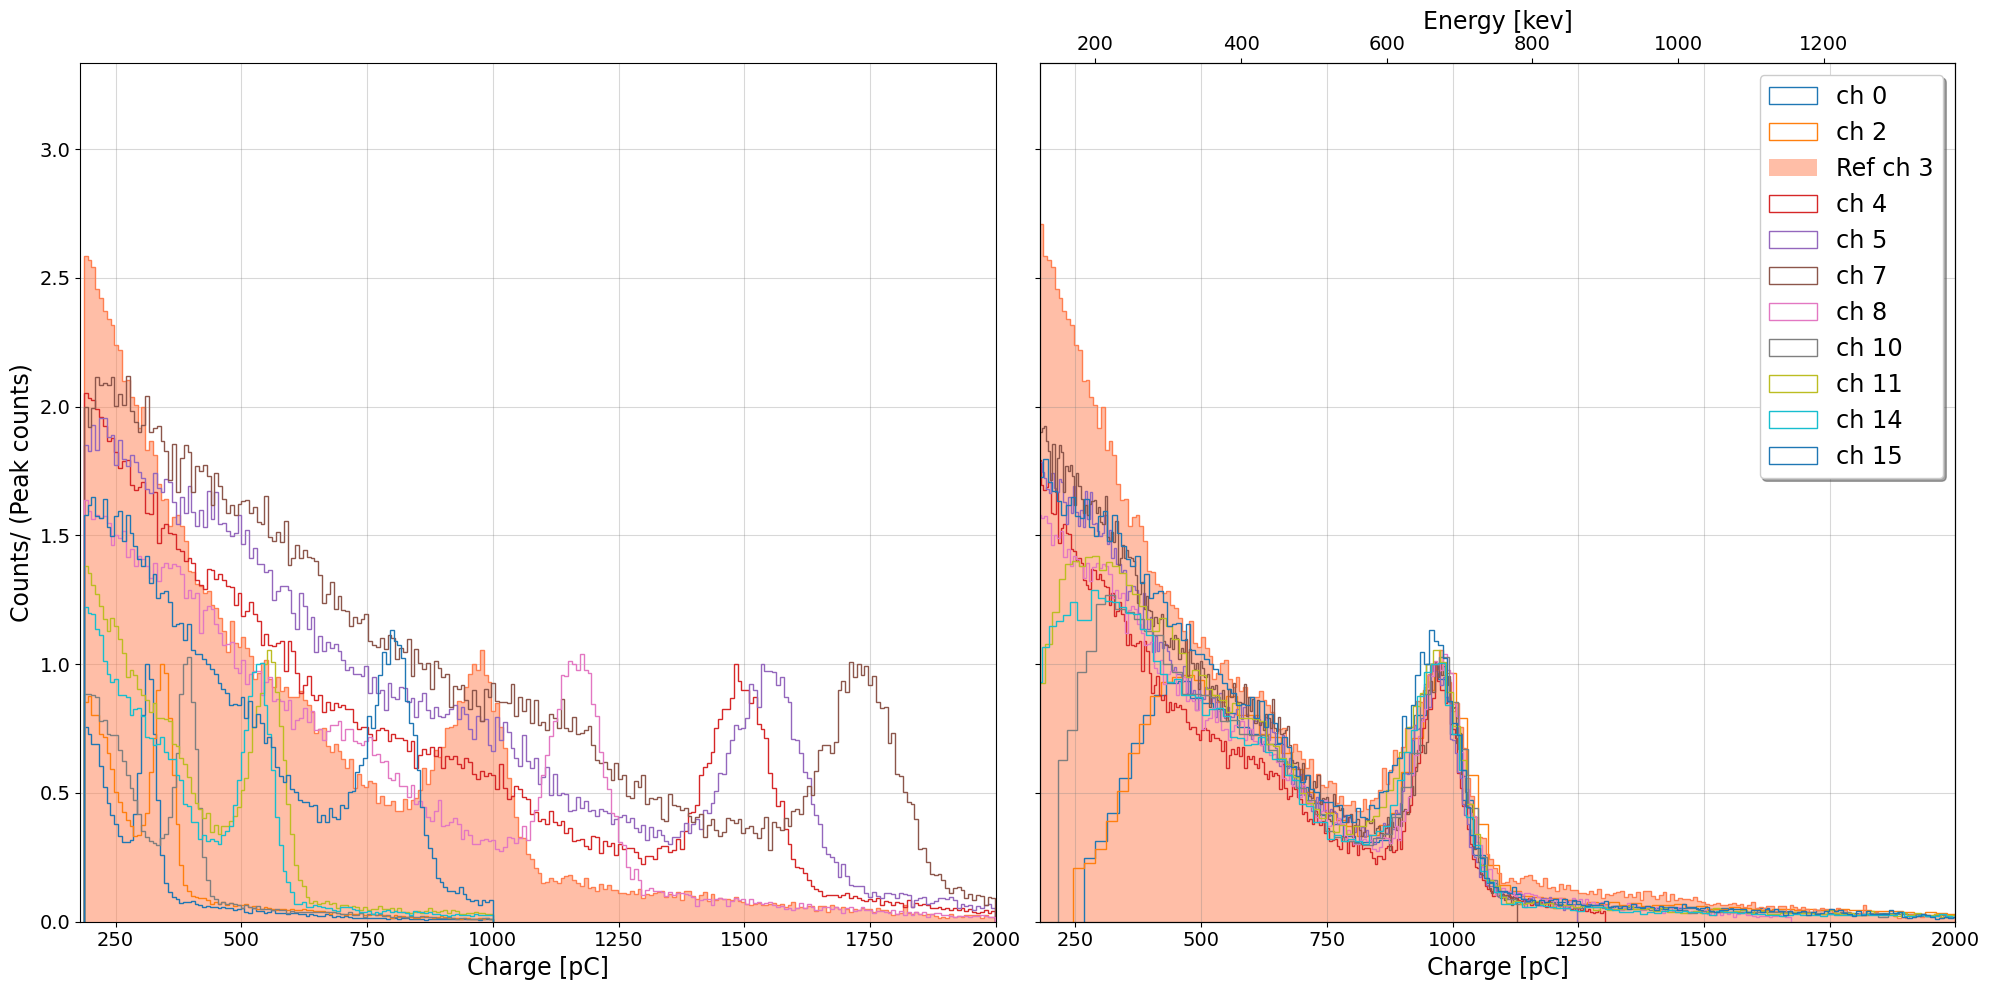

In [156]:

# Creazione del subplot con due grafici con asse y condiviso
fig, (ax3, ax1) = plt.subplots(1, 2, sharey=True, figsize=(20, 10))

# Posizioni dei picchi
peakpos = np.array(data["val_5"])

# Spessore delle linee dei grafici
lw = 1

# Canali interessanti
nice_channels = [0, 2, 3, 4, 5, 7, 8, 10, 11, 14, 15]

# Fattore di rebinning
rebinning = 4

# Funzione per processare il canale
def process_channel(ax, ch):

    lim_N = lim_list[ch]

    edge_N = edge_N_all[channel_idx[ch]]
    bin_N = bin_N_all[channel_idx[ch]]

    # Rebinning
    edge_N, bin_N = rebin_(edge_N, bin_N, rebinning)

    # Convolution
    centers_N = np.convolve(edge_N, [0.5,0.5], mode='valid')

    # Filtraggio basato sui limiti solo per ax3
    if ax == ax3:
        indices = (centers_N > lim_N[0]) & (centers_N < lim_N[1])
        edge_N = edge_N[:len(centers_N)][indices]
        bin_N = bin_N[:len(centers_N)][indices]

    # Indice del picco più vicino
    peak_index = np.argmin(np.abs(peakpos[ch] - edge_N))

    # Normalizzazione
    if ax == ax1:
        edge_N /= coeff_cal[ch]
    bin_N /= bin_N[peak_index]

    label = 'ch {}'.format(ch)
    if ch == channel_ref:
        label = 'Ref ch {}'.format(channel_ref)
        ax.hist(-edge_N, bins=len(bin_N), weights=bin_N, linewidth=lw, color='coral', alpha=0.5, label=label)
        ax.hist(-edge_N, bins=len(bin_N), weights=bin_N, linewidth=lw, histtype='step', fill=False, edgecolor='coral')
    else:
        # Plot per gli altri assi
        ax.hist(-edge_N, bins=len(bin_N), weights=bin_N, linewidth=lw, histtype='step', fill=False, label=label)

# Processa i canali interessanti per il grafico 1
for ch in nice_channels:
    process_channel(ax1, ch)

# Aggiunge la legenda per ax1
ax1.legend(ncol=1, fancybox=True, shadow=True, fontsize="xx-large")

# Limiti sull'asse x per ax1
low, high = 180, 2000
ax1.set_xlim(low, high)

# Etichetta sull'asse x per ax1
ax1.set_xlabel("Charge [pC]", fontsize=17)

# Aggiunge l'asse x gemello
ax2 = ax1.twiny()
ax2.set_xlabel('Energy [kev]', fontsize=17)

#Proporzione secondo asse
ax2.set_xlim(low * 662. / 959, high * 662. / 959)

# Processa i canali interessanti per il grafico 2
for ch in nice_channels:
    process_channel(ax3, ch)

# Limiti dell'asse x, le label e le dimensioni dei caratteri per ax3
ax3.set_xlim(low, high)
ax3.set_xlabel("Charge [pC]", fontsize=17)
ax3.set_ylabel("Counts/ (Peak counts)", fontsize=17)
ax3.set_axisbelow(True)

# Griglia per entrambi gli assi
ax1.grid(color='gray', alpha=0.3)
ax3.grid(color='gray', alpha=0.3)

# Dimensioni dei caratteri per gli assi
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)

# Layout stretto
plt.tight_layout()

# Salva il grafico
plt.savefig("intercalibrazione.png")

